# Hurricanes & Typhoons - Data Analysis

In this project, two different datasets are analyized (from Kaggle https://www.kaggle.com/noaa/hurricane-database): (1) atlantic ocean storms, and (2) pacific ocean storms. Both data sets contain information on storm ID, name, date, time, latitude/longitude, maximum wind (knots, kt), minimum pressure (millibars, mb), and low/moderate/high SE/SW/NE/NW winds. We will look at some features of these hurricanes and typhoons and understand any insights.

Here is a Key of Events that are contained in the dataframes:

$\textbf{C}$ – Closest approach to a coast, not followed by a landfall

$\textbf{G}$ – Genesis

$\textbf{I}$ – An intensity peak in terms of both pressure and wind

$\textbf{L}$ – Landfall (center of system crossing a coastline)

$\textbf{P}$ – Minimum in central pressure

$\textbf{R}$ – Provides additional detail on the intensity of the cyclone when rapid changes are underway

$\textbf{S}$ – Change of status of the system

$\textbf{T}$ – Provides additional detail on the track (position) of the cyclone

$\textbf{W}$ – Maximum sustained wind speed

Key of Status:

$\textbf{TS}$ (Spaces 20-21, before 3rd comma) – Status of system. Options are:

$\textbf{TD}$ – Tropical cyclone of tropical depression intensity (< 34 knots)

$\textbf{TS}$ – Tropical cyclone of tropical storm intensity (34-63 knots)

$\textbf{HU}$ – Tropical cyclone of hurricane intensity (> 64 knots)

$\textbf{EX}$ – Extratropical cyclone (of any intensity)

$\textbf{SD}$ – Subtropical cyclone of subtropical depression intensity (< 34 knots)

$\textbf{SS}$ – Subtropical cyclone of subtropical storm intensity (> 34 knots)

$\textbf{LO}$ – A low that is neither a tropical cyclone, a subtropical cyclone, nor an extratropical cyclone (of any intensity)

$\textbf{WV}$ – Tropical Wave (of any intensity)

$\textbf{DB}$ – Disturbance (of any intensity)

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import plotly.express as px
import datetime as dt
import re
sns.set_style("darkgrid")

# Read in CSV files

In [2]:
atlantic = pd.read_csv('atlantic.csv', parse_dates=['Date', 'Time'])
pacific = pd.read_csv('pacific.csv', parse_dates=['Date', 'Time'])

We check various aspects of the dataframes, such as the dataframe heads, info on null values and data types, and shape.

Notice that missing data values have -999. We will drop these rows later according to which columns we will be using.

In [3]:
atlantic.head()

ID                 Name       Date  Time Event Status Latitude  \
0  AL011851              UNNAMED 1851-06-25     0           HU    28.0N   
1  AL011851              UNNAMED 1851-06-25   600           HU    28.0N   
2  AL011851              UNNAMED 1851-06-25  1200           HU    28.0N   
3  AL011851              UNNAMED 1851-06-25  1800           HU    28.1N   
4  AL011851              UNNAMED 1851-06-25  2100     L     HU    28.2N   

  Longitude  Maximum Wind  Minimum Pressure  ...  Low Wind SW  Low Wind NW  \
0     94.8W            80              -999  ...         -999         -999   
1     95.4W            80              -999  ...         -999         -999   
2     96.0W            80              -999  ...         -999         -999   
3     96.5W            80              -999  ...         -999         -999   
4     96.8W            80              -999  ...         -999         -999   

   Moderate Wind NE  Moderate Wind SE  Moderate Wind SW  Moderate Wind NW  \
0              -999              -999              -999              -999   
1              -999              -999              -999              -999   
2              -999              -999              -999              -999   
3              -999              -999              -999              -999   
4              -999              -999              -999              -999   

   High Wind NE  High Wind SE  High Wind SW  High Wind NW  
0          -999          -999          -999          -999  
1          -999          -999          -999          -999  
2          -999          -999          -999          -999  
3          -999          -999          -999          -999  
4          -999          -999          -999          -999  

[5 rows x 22 columns]

In [4]:
# rows by columns
atlantic.shape

(49105, 22)

In [5]:
pacific.head()

ID                 Name       Date  Time Event Status Latitude  \
0  EP011949              UNNAMED 1949-06-11     0           TS    20.2N   
1  EP011949              UNNAMED 1949-06-11   600           TS    20.2N   
2  EP011949              UNNAMED 1949-06-11  1200           TS    20.2N   
3  EP011949              UNNAMED 1949-06-11  1800           TS    20.3N   
4  EP011949              UNNAMED 1949-06-12     0           TS    20.4N   

  Longitude  Maximum Wind  Minimum Pressure  ...  Low Wind SW  Low Wind NW  \
0    106.3W            45              -999  ...         -999         -999   
1    106.4W            45              -999  ...         -999         -999   
2    106.7W            45              -999  ...         -999         -999   
3    107.7W            45              -999  ...         -999         -999   
4    108.6W            45              -999  ...         -999         -999   

   Moderate Wind NE  Moderate Wind SE  Moderate Wind SW  Moderate Wind NW  \
0              -999              -999              -999              -999   
1              -999              -999              -999              -999   
2              -999              -999              -999              -999   
3              -999              -999              -999              -999   
4              -999              -999              -999              -999   

   High Wind NE  High Wind SE  High Wind SW  High Wind NW  
0          -999          -999          -999          -999  
1          -999          -999          -999          -999  
2          -999          -999          -999          -999  
3          -999          -999          -999          -999  
4          -999          -999          -999          -999  

[5 rows x 22 columns]

In [6]:
# rows by columns
pacific.shape

(26137, 22)

Now we check if there are any null values in each dataset. 

In [7]:
atlantic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49105 entries, 0 to 49104
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                49105 non-null  object        
 1   Name              49105 non-null  object        
 2   Date              49105 non-null  datetime64[ns]
 3   Time              49105 non-null  object        
 4   Event             49105 non-null  object        
 5   Status            49105 non-null  object        
 6   Latitude          49105 non-null  object        
 7   Longitude         49105 non-null  object        
 8   Maximum Wind      49105 non-null  int64         
 9   Minimum Pressure  49105 non-null  int64         
 10  Low Wind NE       49105 non-null  int64         
 11  Low Wind SE       49105 non-null  int64         
 12  Low Wind SW       49105 non-null  int64         
 13  Low Wind NW       49105 non-null  int64         
 14  Moderate Wind NE  4910

In [8]:
pacific.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26137 entries, 0 to 26136
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                26137 non-null  object        
 1   Name              26137 non-null  object        
 2   Date              26137 non-null  datetime64[ns]
 3   Time              26137 non-null  object        
 4   Event             26137 non-null  object        
 5   Status            26137 non-null  object        
 6   Latitude          26137 non-null  object        
 7   Longitude         26137 non-null  object        
 8   Maximum Wind      26137 non-null  int64         
 9   Minimum Pressure  26137 non-null  int64         
 10  Low Wind NE       26137 non-null  int64         
 11  Low Wind SE       26137 non-null  int64         
 12  Low Wind SW       26137 non-null  int64         
 13  Low Wind NW       26137 non-null  int64         
 14  Moderate Wind NE  2613

We will drop the columns 'Low Wind NE', 'Low Wind SE', 'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE', 'Moderate Wind SE', 'Moderate Wind SW', 'Moderate Wind NW', 'High Wind NE', 'High Wind SE', 'High Wind SW', and 'High Wind NW'. We won't need them for this exploratory data analysis.

In [9]:
atlantic = atlantic.drop(columns = ['Low Wind NE',
       'Low Wind SE', 'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE',
       'Moderate Wind SE', 'Moderate Wind SW', 'Moderate Wind NW',
       'High Wind NE', 'High Wind SE', 'High Wind SW', 'High Wind NW'])
pacific = pacific.drop(columns = ['Low Wind NE',
       'Low Wind SE', 'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE',
       'Moderate Wind SE', 'Moderate Wind SW', 'Moderate Wind NW',
       'High Wind NE', 'High Wind SE', 'High Wind SW', 'High Wind NW'])

Drop Pacific Storms with status = ET, PT, ST - they don't match any listed storm statuses

In [10]:
pacific = pacific[(pacific['Status'] != 'ET') & (pacific['Status'] != 'PT') & (pacific['Status'] != 'ST')]

Drop rows with -999 values

In [11]:
atlantic = atlantic[(atlantic['Minimum Pressure'] > 0) & (atlantic['Maximum Wind'] > 0)]
pacific = pacific[(pacific['Minimum Pressure'] > 0) & (pacific['Maximum Wind'] > 0)]

In [12]:
atlantic = atlantic.reset_index()
pacific = pacific.reset_index()
del atlantic['index']
del pacific['index']

In [13]:
atlantic.columns

Index(['ID', 'Name', 'Date', 'Time', 'Event', 'Status', 'Latitude',
       'Longitude', 'Maximum Wind', 'Minimum Pressure'],
      dtype='object')

In addition, we can check some basic statistics of each dataset:

In [14]:
atlantic.describe()

Maximum Wind  Minimum Pressure
count  18436.000000      18436.000000
mean      52.605880        992.244250
std       26.441242         19.113748
min       10.000000        882.000000
25%       30.000000        984.000000
50%       45.000000        999.000000
75%       65.000000       1006.000000
max      165.000000       1024.000000

In [15]:
pacific.describe()

Maximum Wind  Minimum Pressure
count  13333.000000      13333.000000
mean      48.133278        994.994975
std       26.987318         18.125377
min       15.000000        872.000000
25%       30.000000        990.000000
50%       40.000000       1002.000000
75%       60.000000       1007.000000
max      185.000000       1021.000000

# Clean Data: Remove Whitespace in Status

In [16]:
atlantic['Status'] = atlantic['Status'].str.replace(' ', '')
pacific['Status'] = pacific['Status'].str.replace(' ', '')

atlantic['Event'] = atlantic['Event'].str.replace(' ', '')
pacific['Event'] = pacific['Event'].str.replace(' ', '')

# Clean Data: Latitude & Longitude
Latitude and longitude values need to be reformatted since current values cannot be plotted on a map.

In [17]:
def lat_lon(df):
    # remove character
    # W --> -1 ; E --> 1
    df['Longitude'] = [-1*float(re.sub("\D", "", x)) if x[-1] == 'W' 
                       else re.sub("\D", "", x) 
                       for x in df['Longitude']]

    # S --> -1 ; N --> 1
    df['Latitude'] = [-1*float(re.sub("\D", "", x)) if x[-1] == 'S' 
                      else re.sub("\D", "", x)  
                      for x in df['Latitude']]

    
    # decimal point
    df['Longitude'] = [0.10*float(x) for x in df['Longitude']]
    df['Latitude'] = [0.10*float(x) for x in df['Latitude']]
    
    return df
atlantic = lat_lon(atlantic)
pacific = lat_lon(pacific)

In [18]:
atlantic

ID                 Name       Date  Time Event Status  Latitude  \
0      AL011852              UNNAMED 1852-08-26   600     L     HU      30.2   
1      AL031853              UNNAMED 1853-09-03  1200           HU      19.7   
2      AL031854              UNNAMED 1854-09-07  1200           HU      28.0   
3      AL031854              UNNAMED 1854-09-08  1800           HU      31.6   
4      AL031854              UNNAMED 1854-09-08  2000     L     HU      31.7   
...         ...                  ...        ...   ...   ...    ...       ...   
18431  AL122015                 KATE 2015-11-12  1200           EX      41.3   
18432  AL122015                 KATE 2015-11-12  1800           EX      41.9   
18433  AL122015                 KATE 2015-11-13     0           EX      41.5   
18434  AL122015                 KATE 2015-11-13   600           EX      40.8   
18435  AL122015                 KATE 2015-11-13  1200           EX      40.7   

       Longitude  Maximum Wind  Minimum Pressure  
0          -88.6           100               961  
1          -56.2           130               924  
2          -78.6           110               938  
3          -81.1           100               950  
4          -81.1           100               950  
...          ...           ...               ...  
18431      -50.4            55               981  
18432      -49.9            55               983  
18433      -49.2            50               985  
18434      -47.5            45               985  
18435      -45.4            45               987  

[18436 rows x 10 columns]

# Date & Time
Date and time will be reformatted and combined as well. Notice that the time values are not in a proper format such as HH:MM. We will also include day, month, and year in separate columns.

In [19]:
def times(df):
    # add day, month, and year
    df['Month'] = df['Date'].dt.month
    df['Year'] = df['Date'].dt.year
    df['Day'] = df['Date'].dt.day
    
    df['New Time'] = [0 for i in range(len(df))]
    
    df['New Time'] = [dt.datetime.combine(df['Date'][i], dt.datetime.strptime('0000','%H%M').time()) 
                      if df['Time'][i] == '0' 
                      else dt.datetime.combine(df['Date'][i], dt.datetime.strptime(df['Time'][i],'%H%M').time()) 
                      for i in range(len(df))]
    return df

In [20]:
atlantic = times(atlantic)
pacific = times(pacific)

In [21]:
atlantic

ID                 Name       Date  Time Event Status  Latitude  \
0      AL011852              UNNAMED 1852-08-26   600     L     HU      30.2   
1      AL031853              UNNAMED 1853-09-03  1200           HU      19.7   
2      AL031854              UNNAMED 1854-09-07  1200           HU      28.0   
3      AL031854              UNNAMED 1854-09-08  1800           HU      31.6   
4      AL031854              UNNAMED 1854-09-08  2000     L     HU      31.7   
...         ...                  ...        ...   ...   ...    ...       ...   
18431  AL122015                 KATE 2015-11-12  1200           EX      41.3   
18432  AL122015                 KATE 2015-11-12  1800           EX      41.9   
18433  AL122015                 KATE 2015-11-13     0           EX      41.5   
18434  AL122015                 KATE 2015-11-13   600           EX      40.8   
18435  AL122015                 KATE 2015-11-13  1200           EX      40.7   

       Longitude  Maximum Wind  Minimum Pressure  Month  Year  Day  \
0          -88.6           100               961      8  1852   26   
1          -56.2           130               924      9  1853    3   
2          -78.6           110               938      9  1854    7   
3          -81.1           100               950      9  1854    8   
4          -81.1           100               950      9  1854    8   
...          ...           ...               ...    ...   ...  ...   
18431      -50.4            55               981     11  2015   12   
18432      -49.9            55               983     11  2015   12   
18433      -49.2            50               985     11  2015   13   
18434      -47.5            45               985     11  2015   13   
18435      -45.4            45               987     11  2015   13   

                 New Time  
0     1852-08-26 06:00:00  
1     1853-09-03 12:00:00  
2     1854-09-07 12:00:00  
3     1854-09-08 18:00:00  
4     1854-09-08 20:00:00  
...                   ...  
18431 2015-11-12 12:00:00  
18432 2015-11-12 18:00:00  
18433 2015-11-13 00:00:00  
18434 2015-11-13 06:00:00  
18435 2015-11-13 12:00:00  

[18436 rows x 14 columns]

# Relationship between Maximum Wind and Minimum Pressure

We can see that Maximum Wind and Minimum Presssure are correlated. The higher the maximum wind, the lower the minimum pressure usually is. In the storm status model, notice that most hurricanes are located above certain wind values and below a certain minimum pressure value.

[Text(0.5, 1.0, 'Atlantic Storms')]

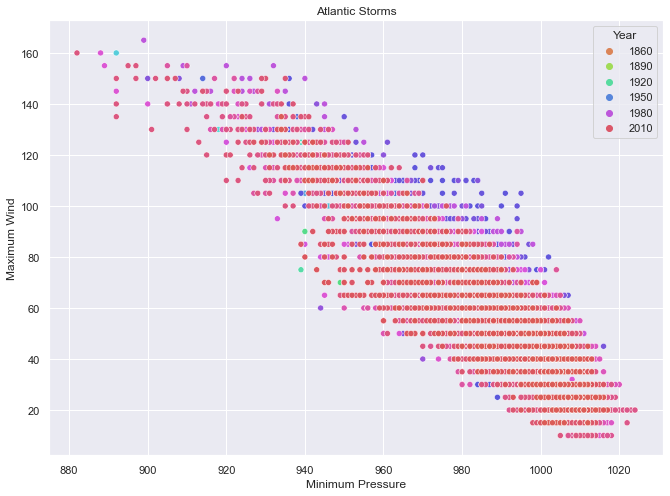

In [56]:
sns.set(rc={'figure.figsize':(11,8)})
sns.scatterplot(data=atlantic, x="Minimum Pressure", y="Maximum Wind", hue = 'Year', palette="hls").set(title='Atlantic Storms')

[Text(0.5, 1.0, 'Pacific Storms')]

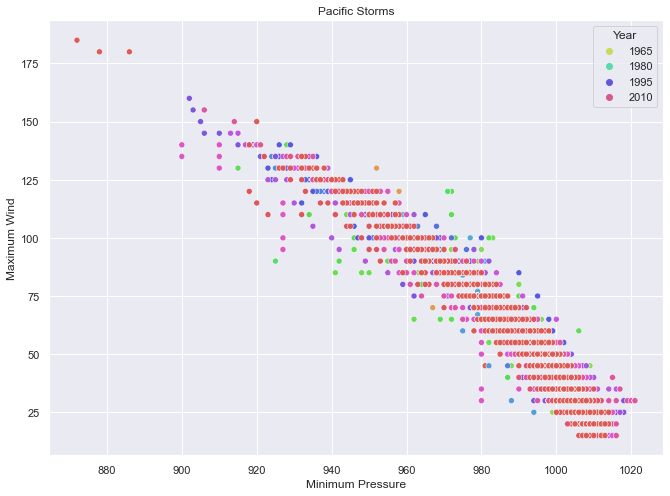

In [57]:
sns.set(rc={'figure.figsize':(11,8)})
sns.scatterplot(data=pacific, x="Minimum Pressure", y="Maximum Wind", hue = 'Year', palette = 'hls').set(title='Pacific Storms')

# Storm Status

Key of Status:

$\textbf{TS}$ (Spaces 20-21, before 3rd comma) – Status of system. Options are:

$\textbf{TD}$ – Tropical cyclone of tropical depression intensity (< 34 knots)

$\textbf{TS}$ – Tropical cyclone of tropical storm intensity (34-63 knots)

$\textbf{HU}$ – Tropical cyclone of hurricane intensity (> 64 knots)

$\textbf{EX}$ – Extratropical cyclone (of any intensity)

$\textbf{SD}$ – Subtropical cyclone of subtropical depression intensity (< 34 knots)

$\textbf{SS}$ – Subtropical cyclone of subtropical storm intensity (> 34 knots)

$\textbf{LO}$ – A low that is neither a tropical cyclone, a subtropical cyclone, nor an extratropical cyclone (of any intensity)

$\textbf{WV}$ – Tropical Wave (of any intensity)

$\textbf{DB}$ – Disturbance (of any intensity)

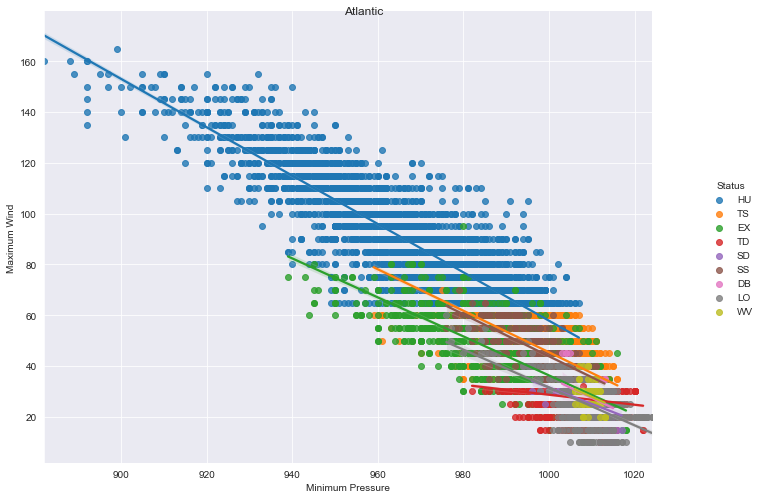

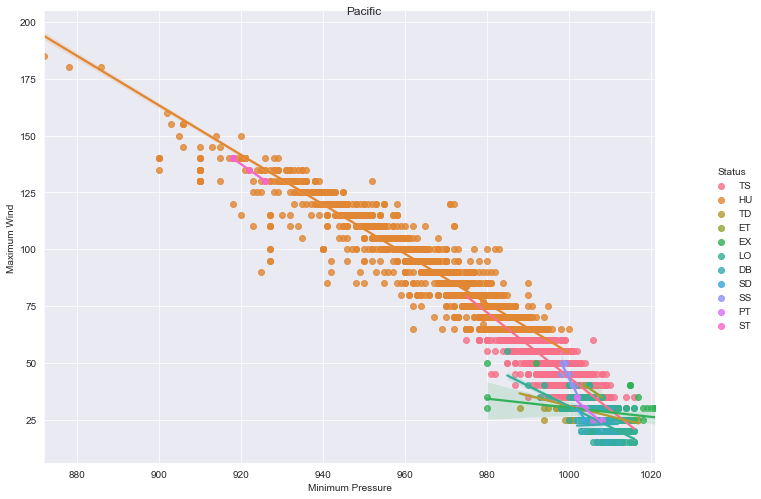

In [24]:
ax3 = sns.lmplot(x = 'Minimum Pressure', y = 'Maximum Wind', hue='Status', data = atlantic)
ax4 = sns.lmplot(x = 'Minimum Pressure', y = 'Maximum Wind', hue='Status', data = pacific)
ax3.fig.suptitle('Atlantic')
ax3.fig.set_size_inches(11,7)
ax4.fig.suptitle('Pacific')
ax4.fig.set_size_inches(11,7)
# ax3.savefig('atl_ws_press.png') 
# ax4.savefig('pac_ws_press.png') 

Here we rename the the status of each storm to its full name

In [25]:
def rename_status(df):
    df['Status'].loc[df['Status'] == 'HU'] = 'Hurricane'
    df['Status'].loc[df['Status'] == 'TS'] = 'Tropical Storm'
    df['Status'].loc[df['Status'] == 'TD'] = 'Tropical Depression'
    df['Status'].loc[df['Status'] == 'EX'] = 'Extratropical Cyclone'
    df['Status'].loc[df['Status'] == 'SD'] = 'Subtropical Depression'
    df['Status'].loc[df['Status'] == 'SS'] = 'Subtropical Storm'
    df['Status'].loc[df['Status'] == 'LO'] = 'Low'
    df['Status'].loc[df['Status'] == 'DB'] = 'Disturbance'
    df['Status'].loc[df['Status'] == 'WV'] = 'Tropical Wave'
    return df
atlantic = rename_status(atlantic)
pacific = rename_status(pacific)


In the plots below, we can see that the more severe storms have lower pressures. In addition, after certain years, more and more storms, aside from "Hurricane," are observed. This could be due to new naming conventions with passing years or technological advances.

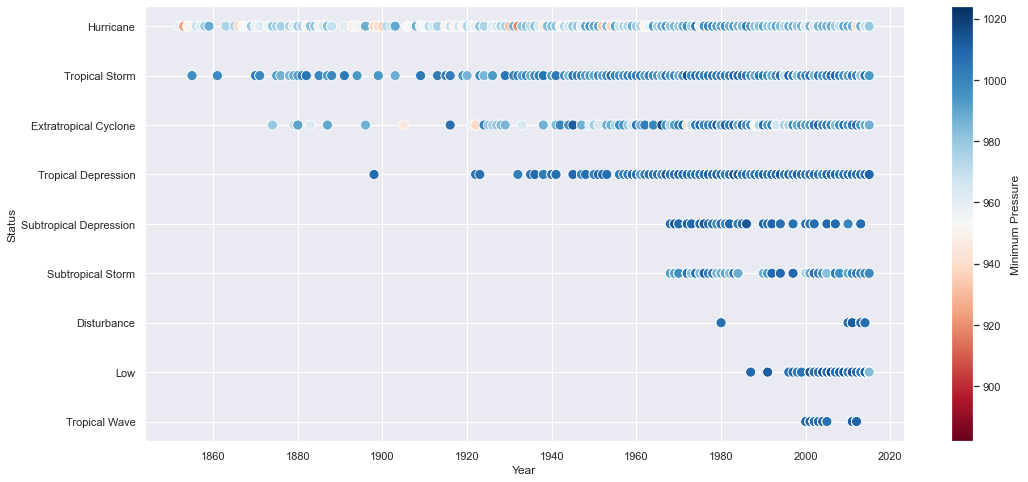

In [26]:
# scatter plot x = year y = min press or max wind with a colorbar depicting max wind / min press
# second option: make a new column with intensity/category --> use for colorbar
sns.set(rc={"figure.figsize":(17, 8)}) #width=3, #height=4
ax = sns.scatterplot(x = 'Year', y = 'Status', hue = 'Minimum Pressure', palette="RdBu", size = 7, data = atlantic, sizes = (100,200))

norm = plt.Normalize(atlantic['Minimum Pressure'].min(), atlantic['Minimum Pressure'].max())
sm = plt.cm.ScalarMappable(cmap = "RdBu", norm=norm)
sm.set_array([])

ax.get_legend().remove()
cbar = ax.figure.colorbar(sm)
cbar.set_label('Minimum Pressure')

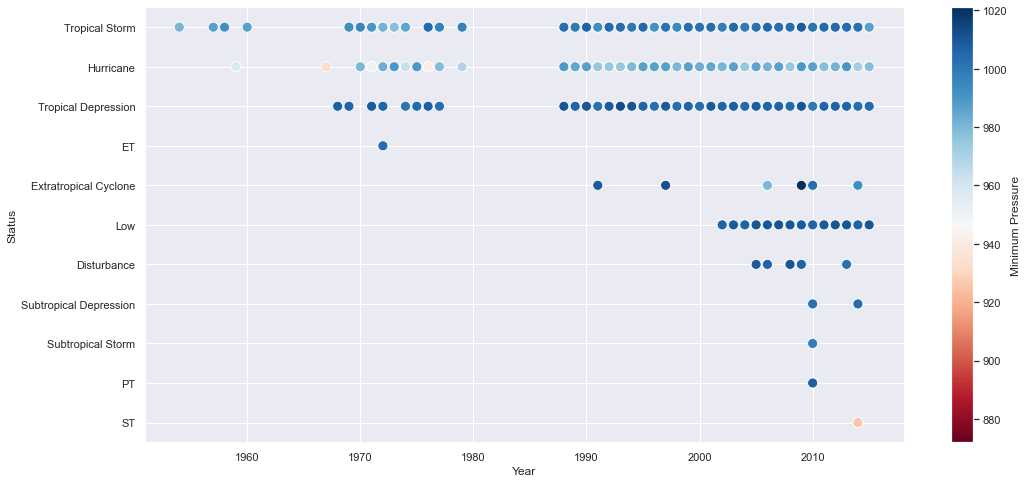

In [27]:
# scatter plot x = year y = min press or max wind with a colorbar depicting max wind / min press
# second option: make a new column with intensity/category --> use for colorbar
sns.set(rc={"figure.figsize":(17, 8)}) #width=3, #height=4
ax = sns.scatterplot(x = 'Year', y = 'Status', hue = 'Minimum Pressure', palette="RdBu", size = 7, data = pacific, sizes = (100,200))

norm = plt.Normalize(pacific['Minimum Pressure'].min(), pacific['Minimum Pressure'].max())
sm = plt.cm.ScalarMappable(cmap = "RdBu", norm=norm)
sm.set_array([])

ax.get_legend().remove()
cbar = ax.figure.colorbar(sm)
cbar.set_label('Minimum Pressure')

Text(0.5, 0.98, 'Pacific')

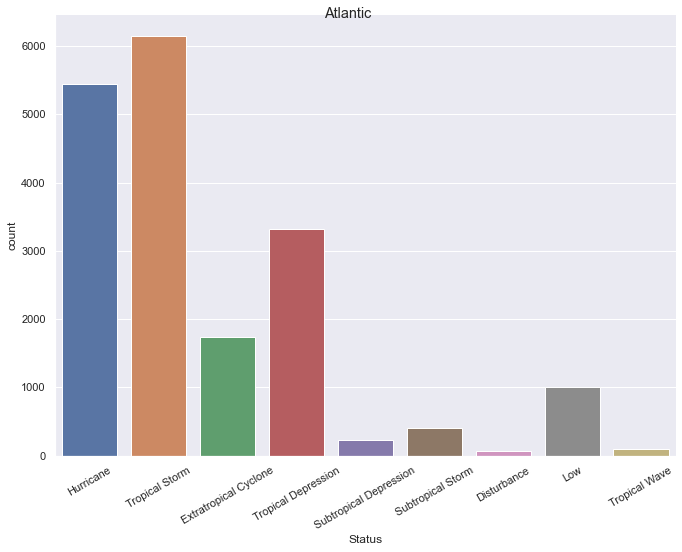

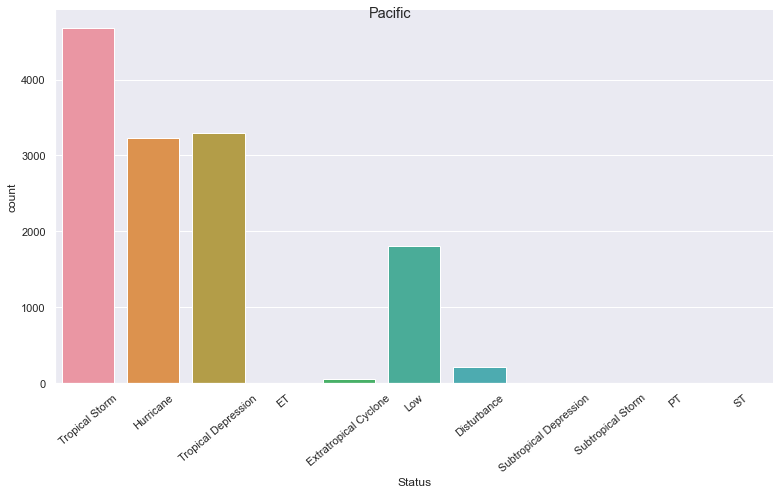

In [28]:
ax5 = sns.catplot(x="Status", kind = 'count', data=atlantic)
ax5.set_xticklabels(rotation=30)
ax5.fig.set_size_inches(11,7)
ax6 = sns.catplot(x="Status", kind = 'count', data=pacific)
ax6.set_xticklabels(rotation=40)
ax6.fig.set_size_inches(11,7)
plt.tight_layout()
ax5.fig.suptitle('Atlantic')
ax6.fig.suptitle('Pacific')
# ax5.savefig('atlantic_status.png')
# ax6.savefig('pacific_status.png')

In the scatterplots below, we can see that there is a denser concentration of storms in more recent years. Reasons could certainly include an increasing number of storms with passing years due to climate change, but we can't rule out technological reasons. It wasn't until the early 20th century that tropical cyclones were monitored $\textit{routinely}$ due to technological advances. However, throughout the 20th century and beyond, we can still see an increase in tropical cyclone activity with more severity. 

[Text(0.5, 1.0, 'Atlantic Storms')]

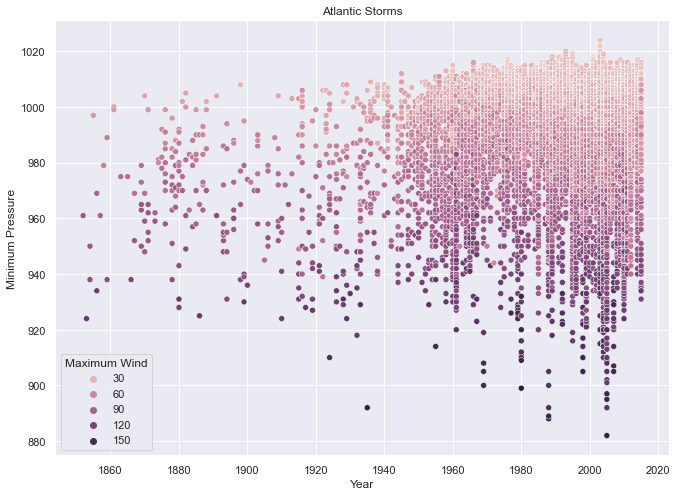

In [29]:
sns.set(rc={'figure.figsize':(11,8)})
sns.scatterplot(data=atlantic, x="Year", y="Minimum Pressure", hue="Maximum Wind").set(title='Atlantic Storms')

[Text(0.5, 1.0, 'Pacific Storms')]

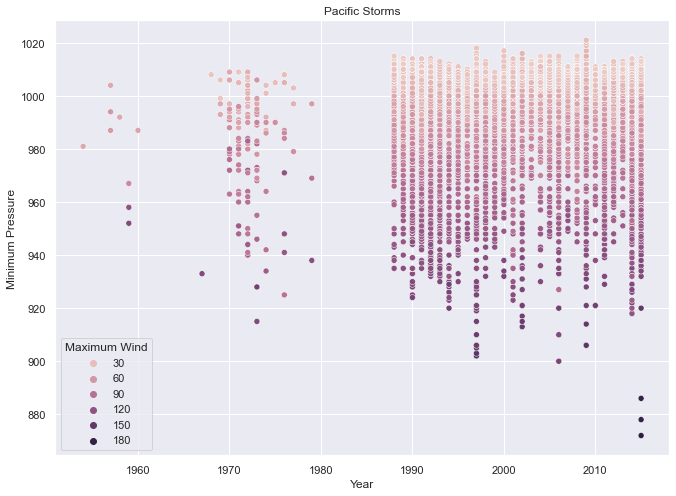

In [30]:
sns.set(rc={'figure.figsize':(11,8)})
sns.scatterplot(data=pacific, x="Year", y="Minimum Pressure", hue="Maximum Wind").set(title='Pacific Storms')

# Minimum Pressure Analysis

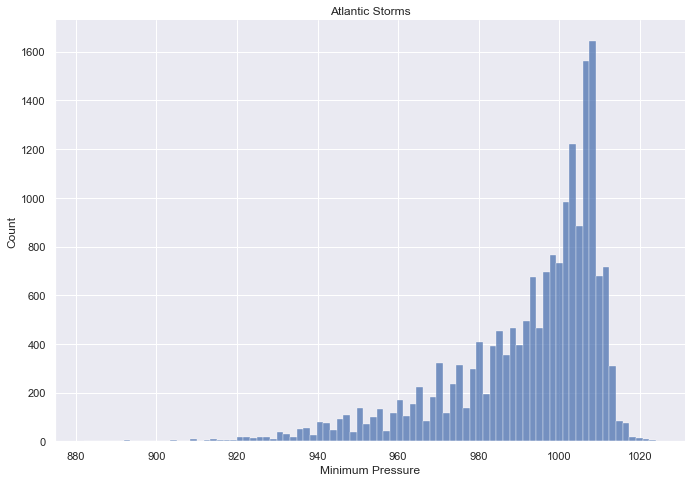

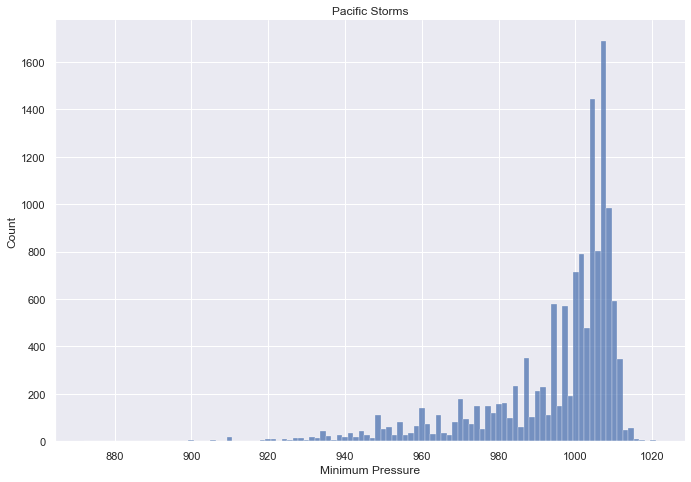

In [31]:
sns.displot(atlantic, x = 'Minimum Pressure').set(title='Atlantic Storms').fig.set_size_inches(11,7)
sns.displot(pacific, x = 'Minimum Pressure').set(title='Pacific Storms').fig.set_size_inches(11,7)

# Maximum Wind Analysis

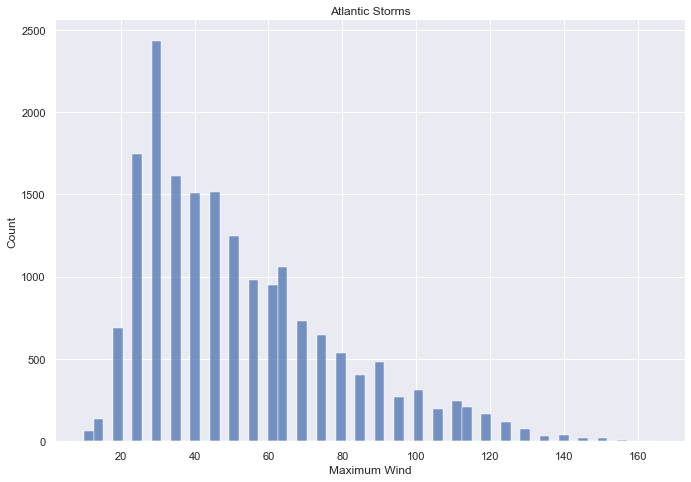

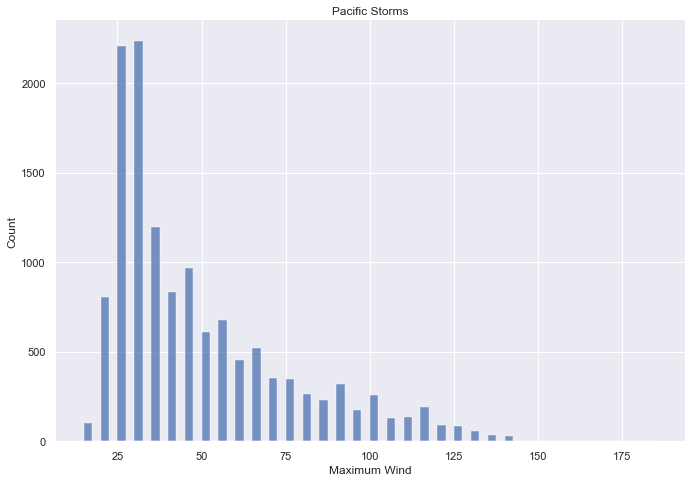

In [32]:
sns.displot(atlantic, x = 'Maximum Wind').set(title='Atlantic Storms').fig.set_size_inches(11,7)
sns.displot(pacific, x = 'Maximum Wind').set(title='Pacific Storms').fig.set_size_inches(11,7)

# Monthly Occurences

In [33]:
print(atlantic['Month'].mode()) # Sept
print(pacific['Month'].mode()) # August

0    9
dtype: int64
0    8
dtype: int64


Note that months January - December are numbered 1 - 12. Most storms (and significant/longer storms) occur in the months of July, August, September, and October. In particular, the most Atlantic storms have happened in September and the most Pacific storms have happened in the month of August.

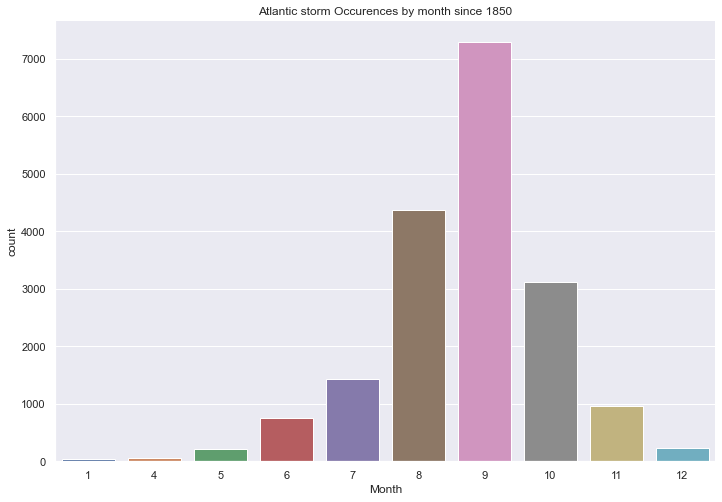

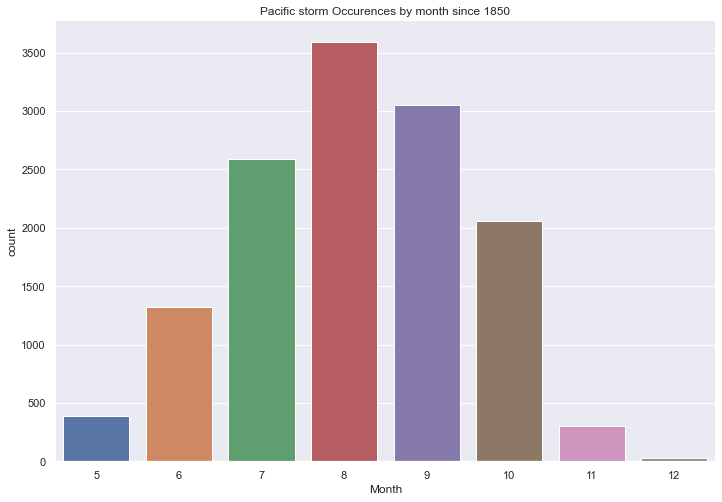

In [34]:
sns.catplot(x="Month", kind = 'count', data = atlantic).set(title='Atlantic storm Occurences by month since 1850').fig.set_size_inches(11,7)
sns.catplot(x="Month", kind = 'count', data = pacific).set(title='Pacific storm Occurences by month since 1850').fig.set_size_inches(11,7)

These functions count the number of storms by year and by month for yearly and monthly analysis.

In [35]:
def year_count(df):
    res = df.groupby('Year')['ID'].nunique()
    counts = pd.DataFrame(data = res)
    year = counts.index
    counts['Year'] = year
    return counts

pac_counts = year_count(pacific)
atl_counts = year_count(atlantic)

In [36]:
def month_count(df):
    res = df.groupby('Month')['ID'].nunique()
    counts = pd.DataFrame(data = res)
    month = counts.index
    counts['Month'] = month
    return counts

pac_m_counts = month_count(pacific)
atl_m_counts = month_count(atlantic)

[Text(0.5, 1.0, 'Pacific Storms by Year')]

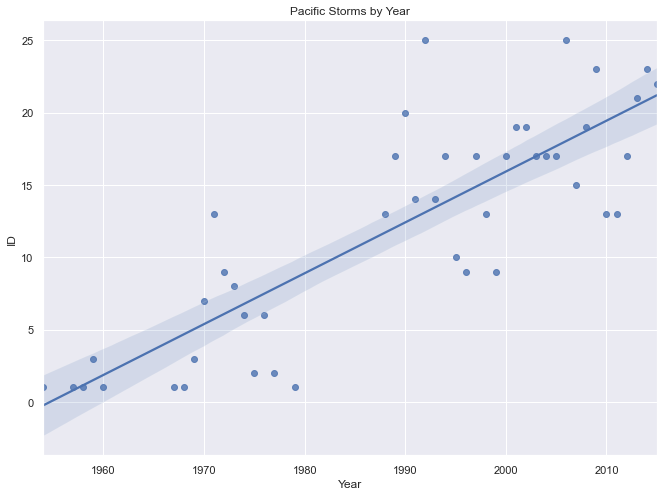

In [37]:
sns.regplot(x="Year", y="ID", data=pac_counts).set(title='Pacific Storms by Year')
# more storms with passing years

[Text(0.5, 1.0, 'Atlantic Storms by Year')]

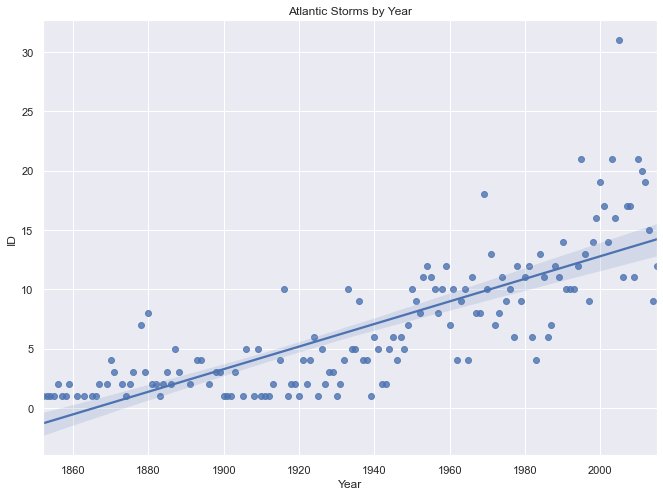

In [38]:
sns.regplot(x="Year", y="ID", data=atl_counts).set(title='Atlantic Storms by Year')
# more storms with passing years

[Text(0.5, 1.0, 'Atlantic Storms by Month')]

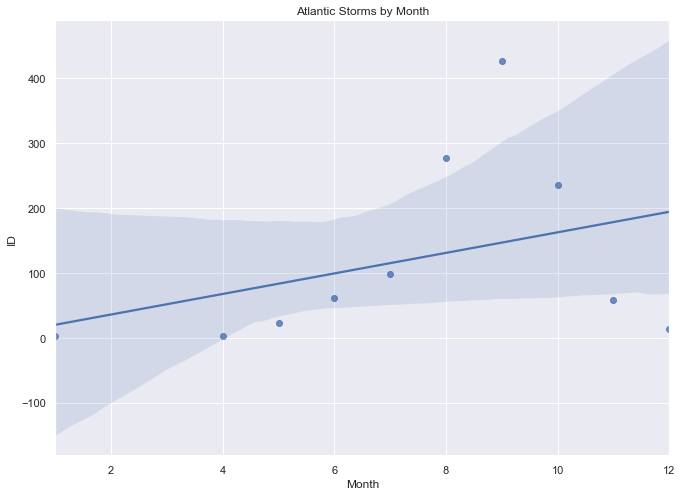

In [39]:
sns.regplot(x="Month", y="ID", data=atl_m_counts).set(title='Atlantic Storms by Month')

[Text(0.5, 1.0, 'Pacific Storms by Month')]

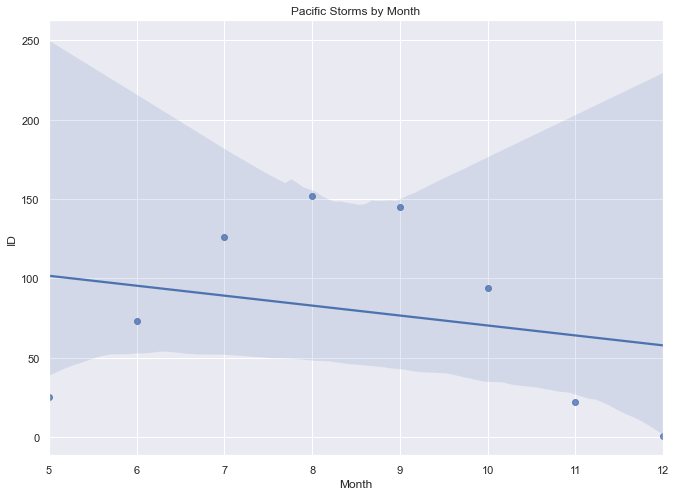

In [40]:
sns.regplot(x="Month", y="ID", data=pac_m_counts).set(title='Pacific Storms by Month')

# Landfall Events

Here is a Key of Events that are contained in the dataframes:

$\textbf{C}$ – Closest approach to a coast, not followed by a landfall

$\textbf{G}$ – Genesis

$\textbf{I}$ – An intensity peak in terms of both pressure and wind

$\textbf{L}$ – Landfall (center of system crossing a coastline)

$\textbf{P}$ – Minimum in central pressure

$\textbf{R}$ – Provides additional detail on the intensity of the cyclone when rapid changes are underway

$\textbf{S}$ – Change of status of the system

$\textbf{T}$ – Provides additional detail on the track (position) of the cyclone

$\textbf{W}$ – Maximum sustained wind speed

After selecting only landfall events, we can see from the pie charts that most of them since 1850 are characterized as Hurricanes, Tropical Depressions, and Tropical Storms. 

In [41]:
landfall_atl = atlantic[atlantic['Event'].str.contains('L')]
landfall_pac = pacific[pacific['Event'].str.contains('L')]
landfall_atl = landfall_atl.reset_index()
landfall_pac = landfall_pac.reset_index()
del landfall_atl['index']
del landfall_pac['index']

In [42]:
landfall_atl.head()

ID                 Name       Date  Time Event     Status  Latitude  \
0  AL011852              UNNAMED 1852-08-26   600     L  Hurricane      30.2   
1  AL031854              UNNAMED 1854-09-08  2000     L  Hurricane      31.7   
2  AL011856              UNNAMED 1856-08-10  1800     L  Hurricane      29.2   
3  AL031858              UNNAMED 1858-09-16  1800     L  Hurricane      41.4   
4  AL061869              UNNAMED 1869-09-08  2100     L  Hurricane      41.0   

   Longitude  Maximum Wind  Minimum Pressure  Month  Year  Day  \
0      -88.6           100               961      8  1852   26   
1      -81.1           100               950      9  1854    8   
2      -91.1           130               934      8  1856   10   
3      -72.0            70               979      9  1858   16   
4      -71.9           100               963      9  1869    8   

             New Time  
0 1852-08-26 06:00:00  
1 1854-09-08 20:00:00  
2 1856-08-10 18:00:00  
3 1858-09-16 18:00:00  
4 1869-09-08 21:00:00

In [43]:
landfall_pac.head()

ID                 Name       Date  Time Event          Status  \
0  EP121959              UNNAMED 1959-10-27  1200     L       Hurricane   
1  EP031989                COSME 1989-06-22   400     L       Hurricane   
2  EP141989                 KIKO 1989-08-27   600     L       Hurricane   
3  EP211989              RAYMOND 1989-10-04  2300     L  Tropical Storm   
4  EP211989              RAYMOND 1989-10-05   500     L  Tropical Storm   

   Latitude  Longitude  Maximum Wind  Minimum Pressure  Month  Year  Day  \
0      19.1     -104.4           120               958     10  1959   27   
1      16.8      -99.0            70               980      6  1989   22   
2      23.6     -109.7           100               960      8  1989   27   
3      26.8     -113.5            45               995     10  1989    4   
4      29.0     -112.2            35              1000     10  1989    5   

             New Time  
0 1959-10-27 12:00:00  
1 1989-06-22 04:00:00  
2 1989-08-27 06:00:00  
3 1989-10-04 23:00:00  
4 1989-10-05 05:00:00

<AxesSubplot:title={'center':'Landfall Events by Status'}, ylabel='None'>

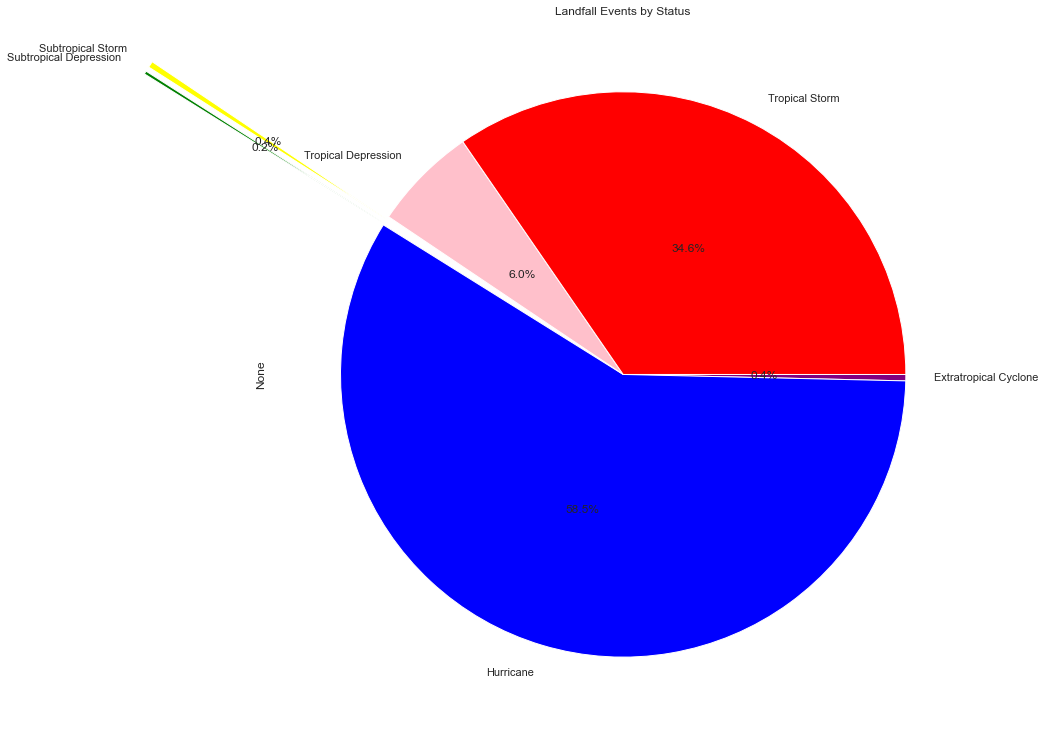

In [44]:
from matplotlib import cm
explode = (0, 0, 1, 1, 0, 0)
labels = ['Tropical Storm', 'Extratropical Cyclone', 'Hurricane','Subtropical Depression', 'Subtropical Storm', 'Tropical Depression', 'Subtropical Depression']
colors = ['purple', 'blue', 'green', 'yellow', 'pink', 'red']
landfall_atl.groupby('Status').size().plot(kind='pie', title = 'Landfall Events by Status', 
                                           explode = explode, counterclock=False, shadow=False, figsize=(13, 13),
                                           colors = colors, autopct='%1.01f%%', pctdistance = 0.5, labeldistance=1.1)


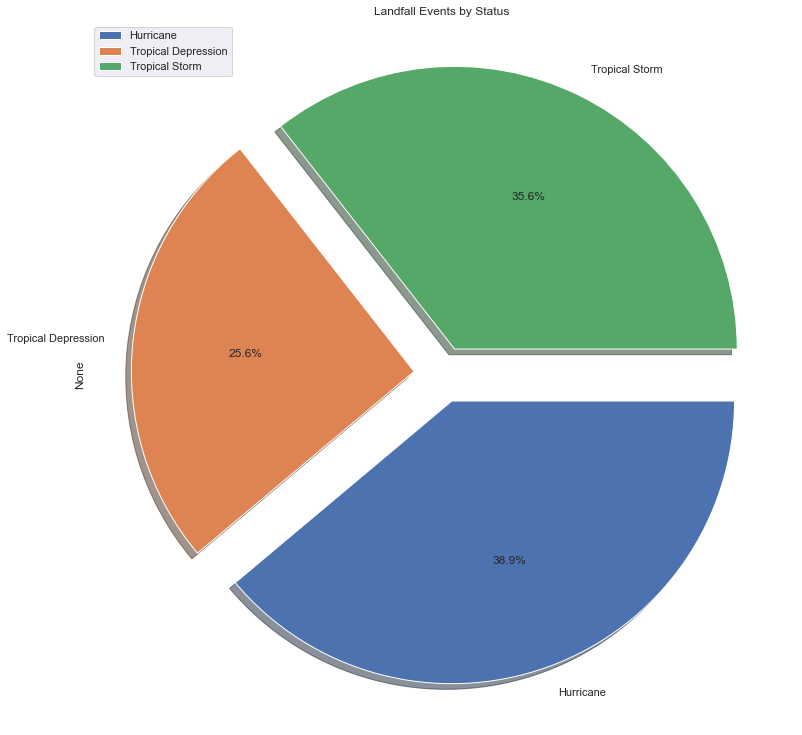

In [45]:
labels = ['Hurricane', 'Tropical Depression', 'Tropical Storm']
explode = (0.1, 0.1, 0.1)
landfall_pac.groupby('Status').size().plot(kind='pie', title = 'Landfall Events by Status',
                                          explode = explode, counterclock=False, shadow=True, figsize=(13, 13), 
                                          autopct='%1.01f%%')
plt.legend(labels, loc = 2)

# Mapping out Landfall events or Close-to-coast events

In [46]:
# all landfall, close to landfall, and intense peak events since 1849
atl_landfall = atlantic[(atlantic['Event'] == 'L') | (atlantic['Event'] == 'C') | (atlantic['Event'] == 'I')].reset_index(drop = True)
atl_landfall.head()

ID                 Name       Date  Time Event     Status  Latitude  \
0  AL011852              UNNAMED 1852-08-26   600     L  Hurricane      30.2   
1  AL031854              UNNAMED 1854-09-08  2000     L  Hurricane      31.7   
2  AL011856              UNNAMED 1856-08-10  1800     L  Hurricane      29.2   
3  AL031858              UNNAMED 1858-09-16  1800     L  Hurricane      41.4   
4  AL061869              UNNAMED 1869-09-08  2100     L  Hurricane      41.0   

   Longitude  Maximum Wind  Minimum Pressure  Month  Year  Day  \
0      -88.6           100               961      8  1852   26   
1      -81.1           100               950      9  1854    8   
2      -91.1           130               934      8  1856   10   
3      -72.0            70               979      9  1858   16   
4      -71.9           100               963      9  1869    8   

             New Time  
0 1852-08-26 06:00:00  
1 1854-09-08 20:00:00  
2 1856-08-10 18:00:00  
3 1858-09-16 18:00:00  
4 1869-09-08 21:00:00

In [47]:
fig = px.scatter_mapbox(atl_landfall, lat="Latitude", lon="Longitude", 
                size="Maximum Wind", color="Maximum Wind",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=10,
                zoom=3, mapbox_style="stamen-terrain")
fig.show()
#fig.write_html('LCI_events_atl.html') # to save the interactive map

In [48]:
pac_landfall = pacific[(pacific['Event'] == 'L') | (pacific['Event'] == 'C') | (pacific['Event'] == 'I')].reset_index(drop = True)
fig2 = px.scatter_mapbox(pac_landfall, lat="Latitude", lon="Longitude", 
                size="Maximum Wind", color="Maximum Wind",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=10,
                zoom=3, mapbox_style="stamen-terrain")
fig2.show()
#fig2.write_html('LCI_events_pac.html') # to save the interactive map

## Huricanes & Typhoons with the lowest pressure and highest wind recorded

Before making some animations, we select the storms with the highest winds and the lowest pressures.

In [49]:
lowest_pressure_atl = atlantic['Minimum Pressure'].min()
low_pressure_ID_atl = atlantic[atlantic['Minimum Pressure'] == lowest_pressure_atl]['ID'].values

highest_wind_atl = atlantic['Maximum Wind'].max()
high_wind_ID_atl = atlantic[atlantic['Maximum Wind'] == highest_wind_atl]['ID'].values

In [50]:
lowest_pressure_pac = pacific['Minimum Pressure'].min()
low_pressure_ID_pac = pacific[pacific['Minimum Pressure'] == lowest_pressure_pac]['ID'].values

highest_wind_pac = pacific['Maximum Wind'].max()
high_wind_ID_pac = pacific[pacific['Maximum Wind'] == highest_wind_pac]['ID'].values

In [51]:
df1 = atlantic[atlantic['ID'] == low_pressure_ID_atl[0]].reset_index(drop = True)
df2 = atlantic[atlantic['ID'] == high_wind_ID_atl[0]].reset_index(drop = True)
df3 = pacific[pacific['ID'] == low_pressure_ID_pac[0]].reset_index(drop = True)
df4 = pacific[pacific['ID'] == high_wind_ID_pac[0]].reset_index(drop = True)

Here are some animations of the trajectories of some of the most severe storms recorded according to minimum pressure and maximum wind. The larger the markers on the plot, the lower the pressure of the hurricane/typhoon.

In [52]:
fig3 = px.scatter_mapbox(df1, lat="Latitude", lon="Longitude", size = 'Minimum Pressure', animation_frame='Day',
                        zoom=3, mapbox_style='carto-positron', title = 'Hurricane with the lowest pressure')
fig3.show()
#fig3.write_html('hurr_low_press.html') #to save the animation

In [53]:
fig4 = px.scatter_mapbox(df2, lat="Latitude", lon="Longitude", size = 'Maximum Wind', animation_frame="Day",
                        zoom=3, mapbox_style='carto-positron', title = 'Hurricane with the highest wind')
fig4.show()
#fig4.write_html('hurr_high_wind.html') #to save the animation

In [54]:
fig5 = px.scatter_mapbox(df3, lat="Latitude", lon="Longitude", size = 'Minimum Pressure', animation_frame='Day',
                        zoom=3, mapbox_style='carto-positron', title = 'Typhoon with the lowest pressure')
fig5.show()
#fig5.write_html('typh_low_press.html') #to save the animation

In [55]:
fig6 = px.scatter_mapbox(df4, lat="Latitude", lon="Longitude", size = 'Maximum Wind', animation_frame="Day",
                        zoom=3, mapbox_style='carto-positron', title = 'Typhoon with the highest wind')
fig6.show()
#fig6.write_html('typh_high_wind.html') #to save the animation